## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


David Goldstein. Part Time. December 6 at 10 am. Jeff Herman


In [3]:
# Your code here - remember to use markdown cells for comments as well!

In [4]:
#import necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import statsmodels.formula.api as sm


from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score as cv_method
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import mean_squared_error





from scipy.stats import kurtosis, skew

### Obtain Data

In [5]:
#read in housing data
kc = pd.read_csv('kc_house_data.csv')

In [6]:
kc.head()
#target = price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Scrub Data

In [7]:
#check for non-numeric variables
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
#Need to convert ? to float before changing sqft_basement column to numeric
#Then, convert former ? values to column median
#The column median does not include the former ? values

In [9]:
kc['sqft_basement'].value_counts()
#454 values are ?

basement = kc[kc.sqft_basement != '?']

In [10]:
sum(basement.sqft_basement == '?')
#? removed confirmed

0

In [11]:
basement.sqft_basement = basement.sqft_basement.astype(float)
#change column values to loat

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
basement.info()
#confirm sqft_basement is float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [13]:
basement.sqft_basement.median()
basement.sqft_basement.mean()

#median is 0
#mean is 291.8

291.851723974838

In [14]:
basement_median = basement.sqft_basement.median()
#Save sqft_basement median

In [15]:
kc.sqft_basement = kc['sqft_basement'].map(lambda x: basement_median if x == '?' else float(x))
#basement is now a float column with no ?

In [16]:
#Get rid of last object category - date
kc = kc.drop(['date'], axis = 1)

In [17]:
#Check for null values
kc.isna().sum()[0:15]

#waterfront - 2376
#view - 63
#yr_renovated - 3842

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
dtype: int64

In [18]:
kc.waterfront.value_counts()
#waterfront is categorical
#bin categories
#can make null it's own category bin

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [19]:
kc.waterfront = kc.waterfront.map(lambda x: x if x >= 0 else 2.0)

In [20]:
#Create Waterfront Bins
kc.waterfront = kc.waterfront.astype('category')
lb = LabelBinarizer()
waterfront_dummies = lb.fit_transform(kc.waterfront)
# convert bins back to dataframe
waterfront_dum_df = pd.DataFrame(waterfront_dummies,columns=['waterfront_no','waterfront_yes', 'waterfront_unknown'])
#add bins to kc
kc = pd.concat([kc, waterfront_dum_df], axis = 1)
#remove unbinned waterfront column
kc = kc.drop(['waterfront'], axis = 1)

In [21]:
kc.view.value_counts()
#view is categorical - each number is view of a different thing rather than a quality rating from 1 to 4 
#only a very small percentage is not one of the categories
#add to most frequent column
#bin

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [22]:
#Store view median
view_median = kc.view.median()
view_median

0.0

In [23]:
#replace NaN with view median
kc.view = kc.view.map(lambda x: x if x >= 0 else view_median)

In [24]:
#Confirm view values
kc.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [25]:
#Confirm no more null values
sum(kc.view.isna())

0

In [26]:
#Create View Bins
kc.view = kc.view.astype('category')
lb = LabelBinarizer()
view_dummies = lb.fit_transform(kc.view)
# convert bins back to dataframe
view_dum_df = pd.DataFrame(view_dummies, columns=['view_0','view_1', 'view_2', 'view_3', 'view_4'])
#add bins to kc
kc = pd.concat([kc, view_dum_df], axis = 1)
#remove unbinned view column
kc = kc.drop(['view'], axis = 1)

In [27]:
kc.yr_renovated.value_counts().head()
#view is numeric and discrete
#0.0 is actually an unknown
#22143 very high percentage is wrong
#remove column
#Otherwise would bin
#year_renovated likely affects value but too many null or 0

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [28]:
kc = kc.drop(['yr_renovated'], axis = 1)

In [29]:
kc.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_no', 'waterfront_yes', 'waterfront_unknown', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4'],
      dtype='object')

In [30]:
#Find columns to drop
#not relevant - id
#non-binned columns with std > mean -  sqft_lot, sqft_lot15, sqft_basement

In [31]:
kc = kc.drop(['id'], axis = 1)

In [32]:
kc = kc.drop(['sqft_lot', 'sqft_lot15', 'sqft_basement'],axis = 1)

No handles with labels found to put in legend.


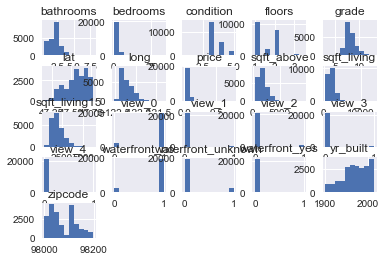

In [33]:
#Plot remaining columns
kc.hist()
plt.legend()
plt.show()

In [34]:
#Assess further necessary changes:
#numerical columns to bin as categories - zipcode, yr_built, lat, long, condition
#zipcode captures geography - don't need latitutde and longitude
#assuming that condition is categorical, 5 different non-numerical

In [35]:
#Look at zipcode values to determine bins
kc.zipcode.describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [36]:
#create bins for zipcode
bins = [0,98015, 98033, 98065, 98118, 98199]
bin_names = []
for index in list(range(0,len(bins)-1)):
    a = 'zip_' + str(bins[index]) + '_' + str(bins[index+1])
    bin_names.append(a)
zip_bins = pd.DataFrame()
for name in bin_names:
    zip_bins[name] = None
for index in list(range(0,len(bins)-1)):
    zip_bins[bin_names[index]] = kc.zipcode.map(lambda x: 1 if x > bins[index] and x <= bins[index + 1] else 0)

In [37]:
#add bins to kc
kc = pd.concat([kc,zip_bins], axis =1)

In [38]:
#drop unnecessary, unbinned geographical columns from kc
kc = kc.drop(['zipcode', 'lat', 'long'], axis = 1)

In [39]:
#Look at yr_built values to determine bins
kc.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [40]:
#create bins for yr_built
bins = [0,1925, 1951, 1975, 1997, 2015]
bin_names = []
for index in list(range(0,len(bins)-1)):
    a = 'yr_built_' + str(bins[index]) + '_' +str(bins[index+1])
    bin_names.append(a)
yr_built_bins = pd.DataFrame()
for name in bin_names:
    yr_built_bins[name] = None
for index in list(range(0,len(bins)-1)):
    yr_built_bins[bin_names[index]] = kc.yr_built.map(lambda x: 1 if x > bins[index] and x <= bins[index + 1] else 0)

In [41]:
#add bins to kc
kc = pd.concat([kc,yr_built_bins], axis =1)

In [42]:
#drop yr_built column
kc = kc.drop(['yr_built'], axis = 1)

In [43]:
#numerical to bin as categories - zipcode, yr_built, lat, long, condition
#assuming that condition is categorical, 5 different non-numerical

In [44]:
#Look at condition values to determine bins
kc.condition.describe()

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [45]:
#Look at condition values to determine bins pt. 2
kc.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [46]:
#bins for condition
kc.condition = kc.condition.astype('category')
lb = LabelBinarizer()
condition_dummies = lb.fit_transform(kc.condition)
# convert bins back to dataframe
condition_dum_df = pd.DataFrame(condition_dummies, columns=['condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5'])
#add bins to kc
kc = pd.concat([kc, condition_dum_df], axis = 1)
#remove unbinned condition column
kc = kc.drop(['condition'], axis = 1)

In [47]:
#View remaining kc columns
kc.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade',
       'sqft_above', 'sqft_living15', 'waterfront_no', 'waterfront_yes',
       'waterfront_unknown', 'view_0', 'view_1', 'view_2', 'view_3', 'view_4',
       'zip_0_98015', 'zip_98015_98033', 'zip_98033_98065', 'zip_98065_98118',
       'zip_98118_98199', 'yr_built_0_1925', 'yr_built_1925_1951',
       'yr_built_1951_1975', 'yr_built_1975_1997', 'yr_built_1997_2015',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5'],
      dtype='object')

In [48]:
#Separate numerical and categorical variables
kc_numeric = kc[list(kc.columns)[0:8]]
kc_categorical = kc[list(kc.columns)[8:]]

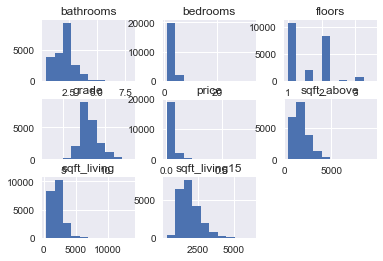

In [49]:
#plot numeric columns
kc_numeric.hist()
plt.show()

In [50]:
#Log transform the numeric columns
kc_numeric_log = kc_numeric
for column in list(kc_numeric_log.columns):
    kc_numeric_log[column] = np.log(kc_numeric_log[column])

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


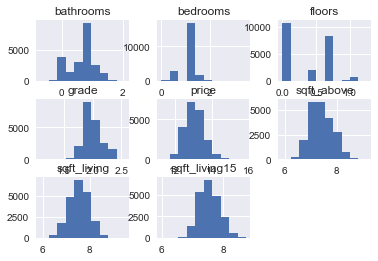

In [51]:
#plot the numeric columns after log transformation
kc_numeric_log.hist()
plt.show()

In [52]:
#standardize each of the numeric columns
kc_numeric_log_std = kc_numeric_log
for column in list(kc_numeric_log_std.columns):
    mean = np.mean(kc_numeric_log_std[column])
    std = np.std(kc_numeric_log_std[column])
    kc_numeric_log_std[column] = (kc_numeric_log_std[column] - mean) / std

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


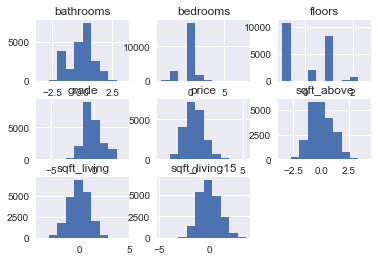

In [53]:
#Plot the normalized and log transformed numeric columns
kc_numeric_log_std.hist()
plt.show()

In [54]:
#Create dataframe with r_squared, intercept, slope, and p-values for numeric categories
values = []
num_columns = list(kc_numeric_log_std.columns[1:])
for column in num_columns:
    values_for_category = []
    f = 'price ~ ' + column
    model = sm.ols(formula = f, data = kc).fit()
    values_for_category.append(column)
    values_for_category.append(model.rsquared)
    values_for_category.append(model.params[0])
    values_for_category.append(model.params[1])
    values_for_category.append(model.pvalues[1])
    values.append(values_for_category)
categories = ['ind_variable', 'r_squared', 'intercept', 'slope', 'p-value']
regression_array = np.array(values)
regression_df = pd.DataFrame(regression_array, columns = categories)
regression_df

,ind_variable,r_squared,intercept,slope,p-value
0,bedrooms,0.0953497028373066,127199.51268533265,122464.44417420312,0.0
1,bathrooms,0.27657672267607736,8712.651752670936,251241.7624951595,0.0
2,sqft_living,0.4926878990403508,-43988.89219422744,280.8630143588747,0.0
3,floors,0.06594805661983039,279114.9959148354,174809.05327963608,0.0
4,grade,0.44615823299735013,-1061415.9916200484,209157.77607213444,0.0
5,sqft_above,0.36647034726583827,59757.11100593556,268.66840596728946,0.0
6,sqft_living15,0.34250726417201927,-83028.48736945572,313.7615453447818,0.0


In [55]:
#All r-squared values are over .01 and all p-values are under .05

In [56]:
#Add log_standardized values back to kc
for column in list(kc_numeric_log_std.columns[1:]):
    kc[column] = kc_numeric_log_std[column]

In [57]:
#Start work on categorical variables

In [58]:
#See list of categorical variables
columns = list(kc.columns)
columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'grade',
 'sqft_above',
 'sqft_living15',
 'waterfront_no',
 'waterfront_yes',
 'waterfront_unknown',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'zip_0_98015',
 'zip_98015_98033',
 'zip_98033_98065',
 'zip_98065_98118',
 'zip_98118_98199',
 'yr_built_0_1925',
 'yr_built_1925_1951',
 'yr_built_1951_1975',
 'yr_built_1975_1997',
 'yr_built_1997_2015',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5']

In [59]:
#create a list for each group of bins within the categorical variables
waterfront_cols = []
view_cols = []
zip_cols = []
yr_built_cols = []
condition_cols = []

for column in columns:
    if 'waterfront' in column:
        waterfront_cols.append(column)

for column in columns:
    if 'view' in column:
        view_cols.append(column)
        
for column in columns:
    if 'zip' in column:
        zip_cols.append(column)
        
for column in columns:
    if 'yr_built' in column:
        yr_built_cols.append(column)
        
for column in columns:
    if 'condition' in column:
        condition_cols.append(column)

In [60]:
#drop and save last item from each bin group for singularity
waterfront_to_drop = waterfront_cols.pop()
view_to_drop = view_cols.pop()
zip_to_drop = zip_cols.pop()
yr_built_to_drop = yr_built_cols.pop()
condition_to_drop = condition_cols.pop()

In [61]:
#drop these bins from kc as well
to_drop_from_categories = [waterfront_to_drop, waterfront_to_drop, zip_to_drop, yr_built_to_drop, condition_to_drop]
kc = kc.drop(to_drop_from_categories, axis = 1)

In [62]:
#create database with r-squared, intercept, slope, and p_value for each categorical variable
cols = [waterfront_cols, view_cols, zip_cols, yr_built_cols, condition_cols]
categorical_values = []
for col in cols:
    for subcat in col:
        values_for_subcat = []
        f = 'price ~' + subcat
        model = sm.ols(formula = f, data = kc).fit()
        values_for_subcat.append(subcat)
        values_for_subcat.append(model.rsquared)
        values_for_subcat.append(model.params[0])
        values_for_subcat.append(model.params[1])
        values_for_subcat.append(model.pvalues[1])
        categorical_values.append(values_for_subcat)
categories = ['ind_variable', 'r_squared', 'intercept', 'slope', 'p-value']
categorical_array = np.array(categorical_values)
categorical_df = pd.DataFrame(categorical_array, columns = categories)
categorical_df

,ind_variable,r_squared,intercept,slope,p-value
0,waterfront_no,0.0032838257309405483,598191.5947660612,-65549.60808191885,3.519655900920011e-17
1,waterfront_yes,0.06985780990281953,532286.2219943125,1184928.5040330947,0.0
2,view_0,0.12690920998946864,937800.3446969793,-440589.6303012865,0.0
3,view_1,0.008574209868555838,536059.2429585743,277314.0237080913,2.4294423840384033e-42
4,view_2,0.02166164054879549,528654.2884205427,262736.0825303471,7.445130269790443e-105
5,view_3,0.033463998103144044,529866.5758452271,443418.6210051637,7.305134169157506e-162
6,zip_0_98015,0.009079771664372016,527160.2996672124,106415.64369362695,9.579712257959327e-45
7,zip_98015_98033,0.005926580511261714,551883.0317417397,-80616.21730874912,9.351538456237958e-30
8,zip_98033_98065,0.0008788377538426762,546363.4290134693,-25616.007508092724,1.3165307064809603e-05
9,zip_98065_98118,0.011042146927206065,516872.70047513465,87041.53231908428,4.401144721400178e-54


In [63]:
#p-value > .05: yr_built_1975_1997, condition_3
#r-squared  < .01: waterfront_no, view_1, zip_0_98015, zip_98015_98033, zip_98033_98065, yr_built_0_1925, yr_built_1925_1951, yr_built_1975_1997, condition_1, condition_2, condition_3,condition_4

In [64]:
#drop columns that fail to meet r-squared and p value criteria
to_drop_from_categorical_regression = ['waterfront_no', 'view_1', 'zip_0_98015', 'zip_98015_98033', 'zip_98033_98065', 'yr_built_0_1925', 'yr_built_1925_1951', 'yr_built_1975_1997', 'condition_1', 'condition_2', 'condition_3', 'condition_4']
kc = kc.drop(to_drop_from_categorical_regression, axis = 1)



### Explore Data 

### Question: Is there Colinearity amongst the predictor variables?

In [65]:
#create dataframe with predictor variables
kc_pred= kc.iloc[:,1:]
kc_pred.head()

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,waterfront_yes,view_0,view_2,view_3,view_4,zip_98065_98118,yr_built_1951_1975
0,-0.279725,-1.726549,-1.125582,-0.960874,-0.525943,-0.753583,-1.035453,0,1,0,0,0,0,1
1,-0.279725,0.339661,0.709463,1.006854,-0.525943,0.672709,-0.326789,0,1,0,0,0,0,0
2,-1.711651,-1.726549,-2.131943,-0.960874,-1.558145,-1.752995,1.126531,0,1,0,0,0,0,0
3,0.736243,1.072660,0.070676,-0.960874,-0.525943,-1.026858,-0.990210,0,1,0,0,0,0,1
4,-0.279725,0.039555,-0.292732,-0.960874,0.368190,0.073516,-0.134221,0,1,0,0,0,1,0


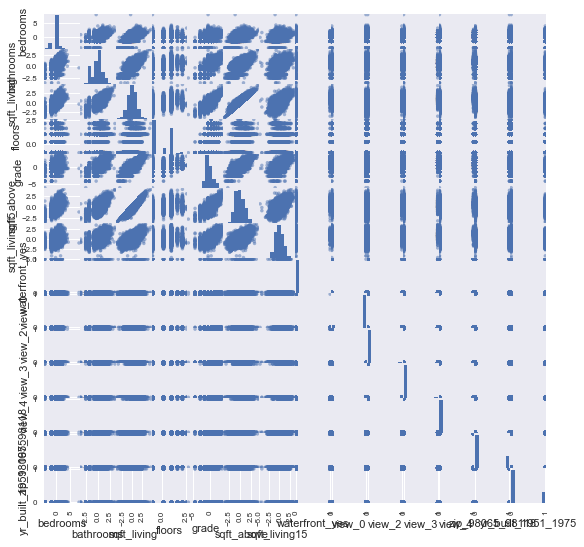

In [66]:
pd.plotting.scatter_matrix(kc_pred,figsize  = [9, 9]);

In [107]:
kc_values = []
for col in list(kc.columns[1:]):
    values_for_col = []
    f = 'price ~' + col
    model = sm.ols(formula = f, data = kc).fit()
    values_for_col.append(col)
    values_for_col.append(model.rsquared)
    values_for_col.append(model.params[0])
    values_for_col.append(model.params[1])
    values_for_col.append(model.pvalues[1])
    kc_values.append(values_for_col)
categories = ['ind_variable', 'r_squared', 'intercept', 'slope', 'p-value']
kc_array = np.array(kc_values)
kc_df = pd.DataFrame(kc_array, columns = categories)
kc_df

,ind_variable,r_squared,intercept,slope,p-value
0,bedrooms,0.08930778187151367,540296.57350555,109783.25072856745,0.0
1,bathrooms,0.20804705711136307,540296.5735056186,167560.72209570906,0.0
2,floors,0.07107554943811967,540296.5735055888,97938.0713953911,0.0
3,grade,0.4034187855248441,540296.5735056235,233329.4157617904,0.0
4,sqft_living15,0.2957494403114088,540296.573505502,199780.64020348393,0.0
5,view_0,0.12690920998946864,937800.3446969793,-440589.6303012865,0.0
6,view_2,0.02166164054879549,528654.2884205427,262736.0825303471,7.445130269790443e-105
7,view_3,0.033463998103144044,529866.5758452271,443418.6210051637,7.305134169157506e-162
8,view_4,0.09184503444321168,526708.3370770675,925757.5462037026,0.0
9,zip_98065_98118,0.011042146927206065,516872.70047513465,87041.53231908428,4.401144721400178e-54


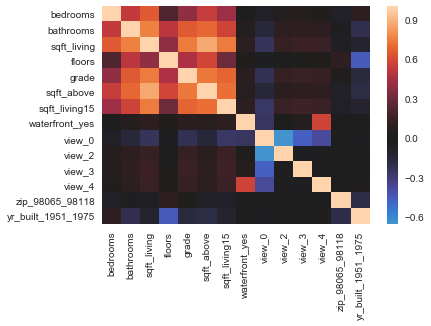

In [68]:
#Check colinearity heat map
kc_pred= kc.iloc[:,1:]
sns.heatmap(kc_pred.corr(), center=0);
#need less colinearity

In [71]:
#pairs of collinearity from visual:
#sqft_living : sqft_above
#waterfront_yes : view_4

#sqft_living_rsquared > sqft_above_rsquared
#view_4 > waterfront_yes

In [72]:
#drop sqft_above and waterfront_yes because they have lower r-squared values than their colinearity counterpart
kc = kc.drop(['sqft_above', 'waterfront_yes'], axis = 1)

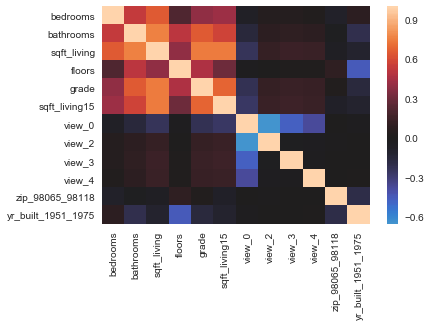

In [73]:
#Check colinearity heat map
kc_pred= kc.iloc[:,1:]
sns.heatmap(kc_pred.corr(), center=0);
#now there is less colinearity

In [74]:
#Check for colinearity numerically using .75 as a cutoff
abs(kc_pred.corr()) > .75

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_living15,view_0,view_2,view_3,view_4,zip_98065_98118,yr_built_1951_1975
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,True,False,False,False,False,False,False
view_0,False,False,False,False,False,False,True,False,False,False,False,False
view_2,False,False,False,False,False,False,False,True,False,False,False,False
view_3,False,False,False,False,False,False,False,False,True,False,False,False
view_4,False,False,False,False,False,False,False,False,False,True,False,False


In [75]:
#pairs of colinearity from plot:
# bathrooms and sqft_living
# grade and sqft_living 
#sqfit_living15 and sqft_living

In [76]:
#drop sqft_living since it has multiple colinearity conflicts
kc = kc.drop(['sqft_living'], axis = 1)

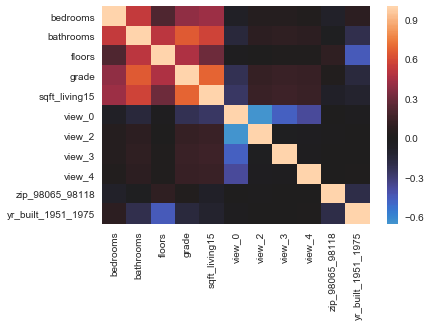

In [77]:
#Check colinearity heat map
kc_pred= kc.iloc[:,1:]
sns.heatmap(kc_pred.corr(), center=0);
# now there is even less colinearity

### Question: Is there too much/too little skewness or kurtosis?

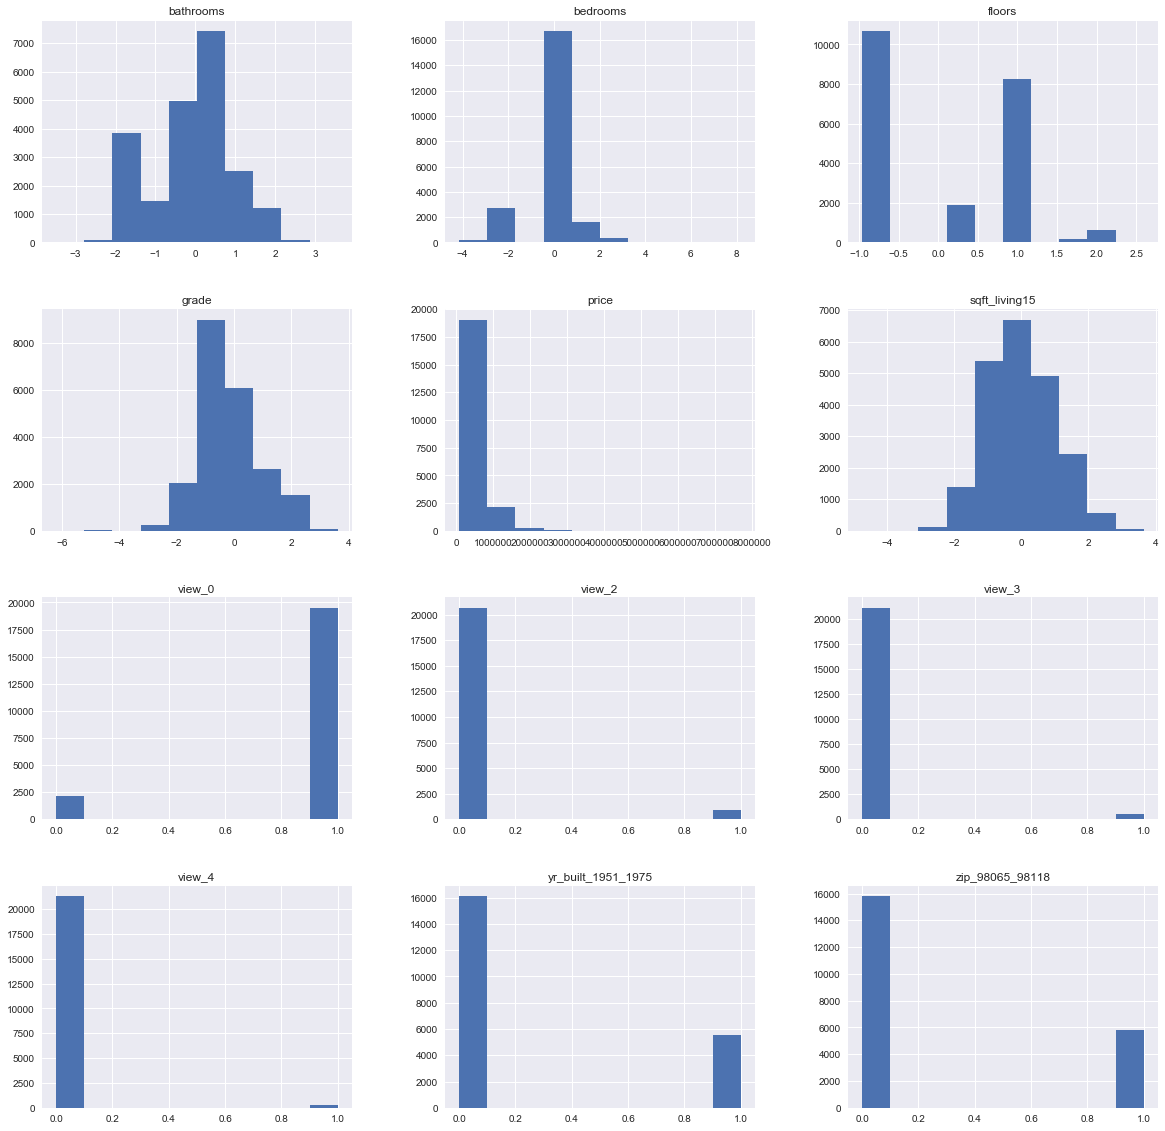

In [79]:
#Check histograms for initial impressions of skewness and kurtosis histograms
kc.hist(figsize = [20,20])
plt.show()

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


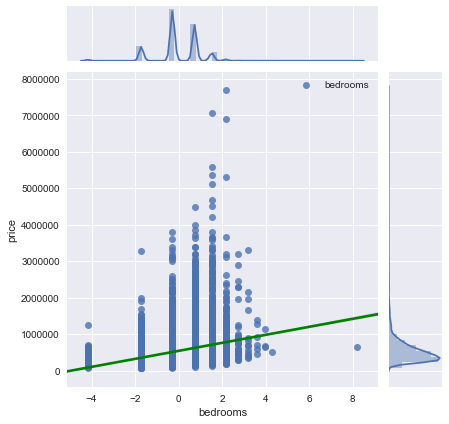

s: -0.68051645921866
k: 2.0511000609073093


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


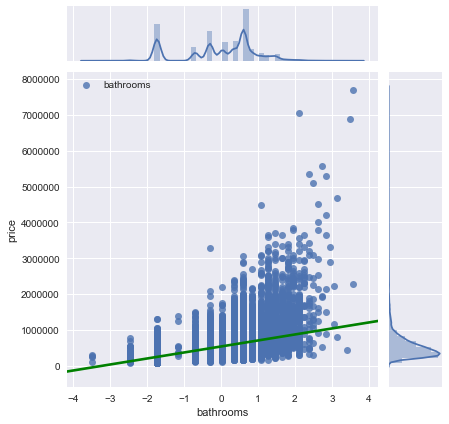

s: -0.4932349556333312
k: -0.46397806748693116


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


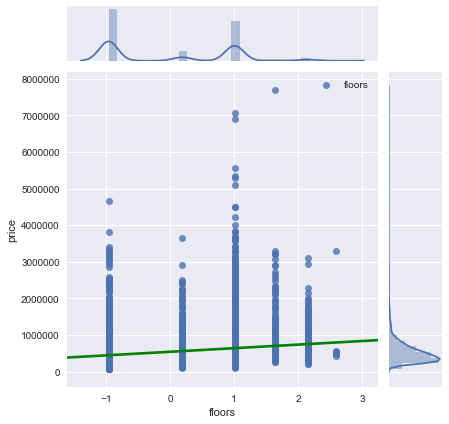

s: 0.2742293830652486
k: -1.5046299770035119


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


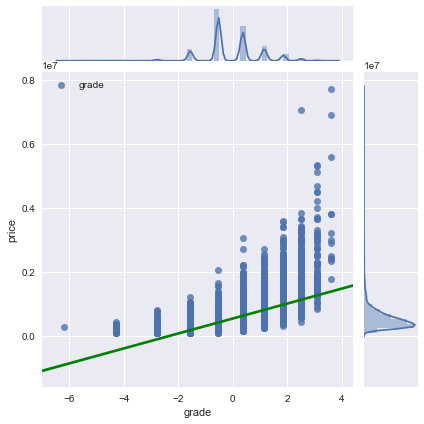

s: 0.21235955805457055
k: 0.7932383493911335


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


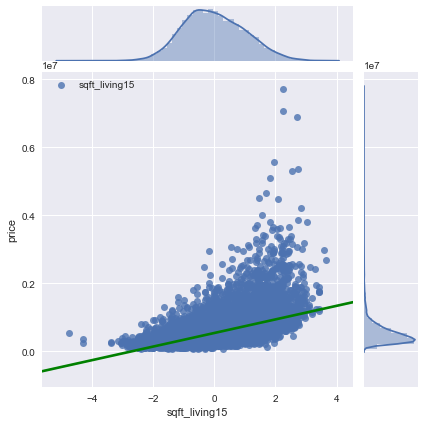

s: 0.20596327075197596
k: -0.20828561479785268


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


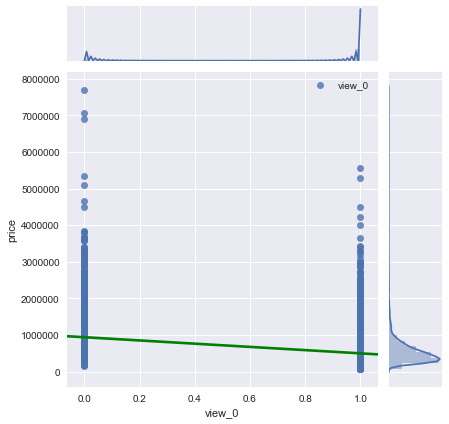

s: -2.708180817962708
k: 5.334243342781162


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


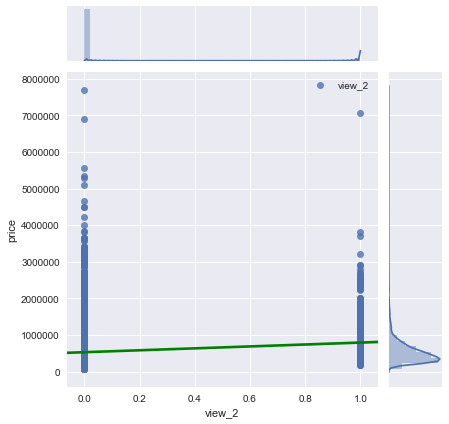

s: 4.428742981726531
k: 17.613764398192018


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


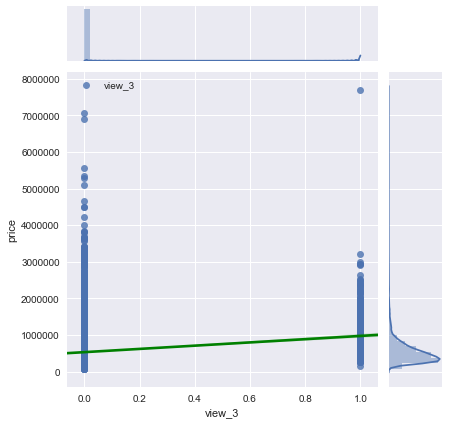

s: 6.287914432852122
k: 37.53786791487001


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


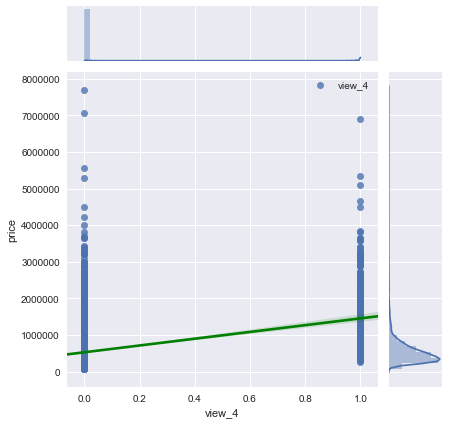

s: 8.07119781420165
k: 63.14423415597349


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


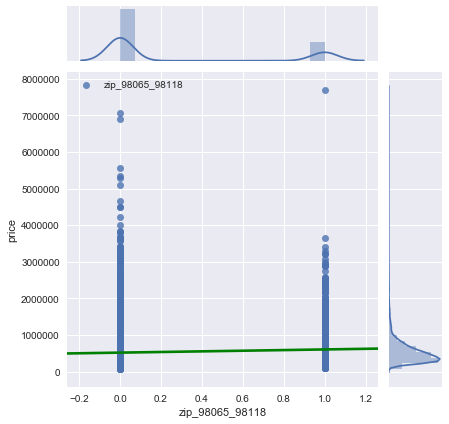

s: 1.041215736214381
k: -0.9158697906595443


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


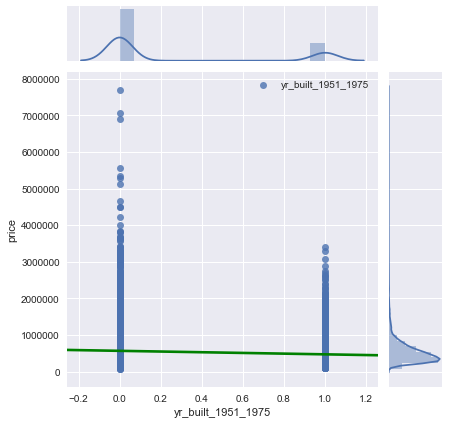

s: 1.1220415001171609
k: -0.7410228720148306


In [80]:
#joint plots with skewness and kurtosis
for column in list(kc.columns):
    if column != 'price':
        sns.jointplot(x = column, y = 'price', data = kc, kind = 'reg', label = column, joint_kws = {'line_kws':{'color':'green'}})
        plt.legend()
        plt.show()
        print('s: ' + str(skew(kc[column])))
        print('k: ' + str(kurtosis(kc[column]))
             )

In [81]:
#strong positive correlation:

#bedrooms
#grade
#sqt_living15
#view_4


#weak positive correlation:

#bathrooms
#floors
#view_2
#view_3
#zip_98065_98118


#weak negative correlation:

#view_0
#yr_built_1951_1975


#sqft_living is fairly normal


In [82]:
#skew values for non-categorical columns

#weak negative skew:
#bedrooms



#symmetrical:
#bathrooms
#floors
#grade
#sqt_living15

In [83]:
#kurtosis for non-categorical columns


#Platykurtic (K<3):
#bathrooms: negative
#grade
#sqft_living15: negative


#Mesokurtic (K=3):
#bedrooms

#Leptokurtic (K>3):

In [84]:
#Keeping negative Platykurtic for now, might come back to remove them

In [85]:
kc.head()

,price,bedrooms,bathrooms,floors,grade,sqft_living15,view_0,view_2,view_3,view_4,zip_98065_98118,yr_built_1951_1975
0,221900.0,-0.279725,-1.726549,-0.960874,-0.525943,-1.035453,1,0,0,0,0,1
1,538000.0,-0.279725,0.339661,1.006854,-0.525943,-0.326789,1,0,0,0,0,0
2,180000.0,-1.711651,-1.726549,-0.960874,-1.558145,1.126531,1,0,0,0,0,0
3,604000.0,0.736243,1.072660,-0.960874,-0.525943,-0.990210,1,0,0,0,0,1
4,510000.0,-0.279725,0.039555,-0.960874,0.368190,-0.134221,1,0,0,0,1,0


### Model Data

In [86]:
#model data with all features

In [87]:
# y is target
y = kc['price']
# x are target variables
X = kc.drop(['price'], axis = 1)
linreg = LinearRegression()

In [89]:
#Run regression
features_string = ''
for i in list(range(0,len(X.columns))):
    if i == 0:
        features_string = features_string + str(list(X.columns)[i])
    else:
        features_string = features_string + ' + ' + str(list(X.columns)[i])
f = 'price ~ ' + features_string
model = sm.ols(formula = f, data = kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     2000.
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:28:28   Log-Likelihood:            -2.9980e+05
No. Observations:               21597   AIC:                         5.996e+05
Df Residuals:                   21585   BIC:                         5.997e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.894e+05   1.44e+04     47.754      0.000    6.61e+05    7.18e+05
bedrooms            1.578e+04   2181.328      7.236      0.000    1.15e+04    2.01e+04
bathrooms            1.32e+04   2736.267      4.825      0.000    7840.300    1.86e+04
floors             -1.809e+04   2308.257     -7.838      0.000   -2.26e+04   -1.36e+04
grade               1.638e+05   2795.035     58.606      0.000    1.58e+05    1.69e+05
sqft_living15       5.816e+04   2556.253     22.751      0.000    5.31e+04    6.32e+04
view_0             -1.926e+05   1.44e+04    -13.335      0.000   -2.21e+05   -1.64e+05
view_2             -4.601e+04   1.65e+04     -2.786      0.005   -7.84e+04   -1.36e+04
view_3              5.688e+04   1.83e+04      3.107      0.002     2.1e+04    9.28e+04
view_4              4.907e+05   2.04e+04     24.069      0.000    4.51e+05    5.31e+05
zip_98065_98118     9.042e+04   4090.991     22.102      0.000    8.24e+04    9.84e+04
yr_built_1951_1975 -2.422e+04   4686.309     -5.168      0.000   -3.34e+04    -1.5e+04
==============================================================================
Omnibus:                    20553.173   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2769323.277
Skew:                           4.221   Prob(JB):                         0.00
Kurtosis:                      57.829   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#view_2 and view_3 have higher p-values, and all of the view columns have crazy high standard errors
#will check this in model validation

### Validating the Model

In [91]:
#validating model using all remaining features

In [111]:
#train-test validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)
linreg.fit(X_train,y_train)
yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)
mse_train = mean_squared_error(y_train, yhat_train)
print("MSE train: " + str(mse_train))
mse_test = mean_squared_error(y_test, yhat_test)
print("MSE test: " + str(mse_test))

MSE train: 65490039389.53065
MSE test: 72239265333.16696


In [94]:
#check to see if eliminating view columns helps mean squared error - it reduced standard error

In [95]:
#run regression without view columns
f = 'price ~ bedrooms + bathrooms + floors + grade + sqft_living15 + zip_98065_98118 + yr_built_1951_1975'
model = sm.ols(formula = f, data = kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     2441.
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:28:28   Log-Likelihood:            -3.0110e+05
No. Observations:               21597   AIC:                         6.022e+05
Df Residuals:                   21589   BIC:                         6.023e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            5.19e+05   2634.915    196.965      0.000    5.14e+05    5.24e+05
bedrooms            7947.5376   2310.196      3.440      0.001    3419.384    1.25e+04
bathrooms             1.7e+04   2903.617      5.854      0.000    1.13e+04    2.27e+04
floors             -2.618e+04   2441.558    -10.723      0.000    -3.1e+04   -2.14e+04
grade               1.772e+05   2952.786     60.008      0.000    1.71e+05    1.83e+05
sqft_living15       7.619e+04   2681.240     28.415      0.000    7.09e+04    8.14e+04
zip_98065_98118     9.412e+04   4342.398     21.675      0.000    8.56e+04    1.03e+05
yr_built_1951_1975 -1.573e+04   4971.831     -3.164      0.002   -2.55e+04   -5987.982
==============================================================================
Omnibus:                    21197.995   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2658091.241
Skew:                           4.488   Prob(JB):                         0.00
Kurtosis:                      56.603   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#result without view columns - lower standard errors but also lower r-squared
#might have a dilemna if MSE is lower wihtout view columns - let's check

In [112]:
# create dataframe with kc info but without view columns
kc_a = kc.drop(['view_0', 'view_2', 'view_3', 'view_4'],axis = 1)

y_a = kc_a['price']
X_a = kc_a.drop(['price'], axis = 1)
linreg = LinearRegression()

#run train-test validation
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size = 0.2, random_state=3)

linreg.fit(X_train,y_train)
yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)
mse_train = mean_squared_error(y_train, yhat_train)
print("MSE train: " + str(mse_train))
mse_test = mean_squared_error(y_test, yhat_test)
print("MSE test: " + str(mse_test))

MSE train: 73957100981.92123
MSE test: 80861481202.15625


In [98]:
#Leaving out the view columns increases MSE -> leave them in

### Question: Does the model work better without the variables with negative kurtosis?

In [99]:
# Run regression with variables without negative kurtosis - bathrooms and sqft_living15
f = 'price ~ bedrooms + floors + grade  + view_0 + view_2 + view_3 + view_4 + zip_98065_98118 + yr_built_1951_1975'
model = sm.ols(formula = f, data = kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     2317.
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:28:28   Log-Likelihood:            -3.0009e+05
No. Observations:               21597   AIC:                         6.002e+05
Df Residuals:                   21587   BIC:                         6.003e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.193e+05   1.46e+04     49.348      0.000    6.91e+05    7.48e+05
bedrooms            3.121e+04   1986.370     15.712      0.000    2.73e+04    3.51e+04
floors             -1.746e+04   2255.326     -7.742      0.000   -2.19e+04    -1.3e+04
grade               2.035e+05   2220.826     91.648      0.000    1.99e+05    2.08e+05
view_0             -2.189e+05   1.46e+04    -15.000      0.000   -2.48e+05    -1.9e+05
view_2             -5.312e+04   1.67e+04     -3.174      0.002   -8.59e+04   -2.03e+04
view_3              5.748e+04   1.86e+04      3.098      0.002    2.11e+04    9.38e+04
view_4              4.959e+05   2.07e+04     24.002      0.000    4.55e+05    5.36e+05
zip_98065_98118     7.796e+04   4108.409     18.976      0.000    6.99e+04     8.6e+04
yr_built_1951_1975 -3.427e+04   4710.721     -7.276      0.000   -4.35e+04    -2.5e+04
==============================================================================
Omnibus:                    20187.031   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2494701.244
Skew:                           4.121   Prob(JB):                         0.00
Kurtosis:                      55.003   Cond. No.                         26.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#Lower r-squared with all of the features -> go back to the original model

# FINAL MODEL

In [101]:
#Repeat regression for final model
features_string = ''
for i in list(range(0,len(X.columns))):
    if i == 0:
        features_string = features_string + str(list(X.columns)[i])
    else:
        features_string = features_string + ' + ' + str(list(X.columns)[i])
f = 'price ~ ' + features_string
model = sm.ols(formula = f, data = kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     2000.
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:28:28   Log-Likelihood:            -2.9980e+05
No. Observations:               21597   AIC:                         5.996e+05
Df Residuals:                   21585   BIC:                         5.997e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.894e+05   1.44e+04     47.754      0.000    6.61e+05    7.18e+05
bedrooms            1.578e+04   2181.328      7.236      0.000    1.15e+04    2.01e+04
bathrooms            1.32e+04   2736.267      4.825      0.000    7840.300    1.86e+04
floors             -1.809e+04   2308.257     -7.838      0.000   -2.26e+04   -1.36e+04
grade               1.638e+05   2795.035     58.606      0.000    1.58e+05    1.69e+05
sqft_living15       5.816e+04   2556.253     22.751      0.000    5.31e+04    6.32e+04
view_0             -1.926e+05   1.44e+04    -13.335      0.000   -2.21e+05   -1.64e+05
view_2             -4.601e+04   1.65e+04     -2.786      0.005   -7.84e+04   -1.36e+04
view_3              5.688e+04   1.83e+04      3.107      0.002     2.1e+04    9.28e+04
view_4              4.907e+05   2.04e+04     24.069      0.000    4.51e+05    5.31e+05
zip_98065_98118     9.042e+04   4090.991     22.102      0.000    8.24e+04    9.84e+04
yr_built_1951_1975 -2.422e+04   4686.309     -5.168      0.000   -3.34e+04    -1.5e+04
==============================================================================
Omnibus:                    20553.173   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2769323.277
Skew:                           4.221   Prob(JB):                         0.00
Kurtosis:                      57.829   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Validation

In [102]:
#Cross Validation

In [103]:
#k = number of features = 10 (common number)

In [104]:
#Run cross validation
cv_results = cv_method(linreg, X, y , cv = 10, scoring = 'neg_mean_squared_error')
cv_results

array([-7.10334709e+10, -8.29784604e+10, -6.02402388e+10, -8.85371838e+10,
       -5.80075024e+10, -5.86980507e+10, -5.88761195e+10, -5.76302620e+10,
       -6.55597240e+10, -7.06822127e+10])

In [114]:
#Run cross validation with total number of features
#k = number of features (11)
cv_results = cv_method(linreg, X, y , cv = len(X.columns), scoring = 'neg_mean_squared_error')
cv_results

array([-7.07212398e+10, -8.31774758e+10, -6.63123611e+10, -7.84383081e+10,
       -7.34795825e+10, -5.25774006e+10, -5.96255237e+10, -6.21224171e+10,
       -5.29169496e+10, -6.75386336e+10, -7.22167082e+10])

### Interpret Model

Coefficient 1 - grade: for every increase of 1 unit of grade, the price can be expected to go up $163,800

Coefficient 2 - bedrooms: for every increase of 1 unit of bedrooms, the price can be expected to go up $15,780

Coefficient 3 - bathrooms: for every increase of 1 unit of bathrooms, the price can be expected to go up $13,200

Final Model Explanation: 

The model explains about 50% of the variance in data. This percentage is not ideal but shows some level of reliability. Views and overall house grade seem to be the most obvious predictors of price. Other factors that would make sense for housing price indicators also have a demonstrable impact such as bedrooms, bathrooms, and square footage. This model was developed primarily by eliminating predictor columns with overly large p-values, too small r-squared values, and colinearity. Models with different combinations of predictor variables were tested but failed to exceed the r-squared values of the final model.

Approach to project (OSEMiN):

The project started out with obtaining data from the Kansas City Housing Data file using Pandas. The bulk of the project consisted of scrubbing, namely binning categorical variables, normalizing numeric variables, and getting rid of null values. The project then moved on to exploring the data, which helped in the process of understandings which categories would be most relevant to the model primarily based on p-value, r-squared value, and multicolinearity. The model itself consisted of a multiple regression; alternatives were tried to see if the r-squared value could be increased. Lastly, the model was intepreted as having the three most obvious precictors of price be different types of views and the overall house grade. Overall, this method was a logical and useful way to break down the data and turn it into a validated model.